In [1]:
import matplotlib.pyplot as plt  #for visualization
import seaborn as sns  #for advanced visualization
import pandas as pd #for dataframe handling
import numpy as np #for array operations 
import datetime

In [2]:
gold = pd.read_csv("gold_price_data.csv")
gold['Date'] = pd.to_datetime(gold['Date'], errors='coerce')
gold

,Date,Value
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


In [3]:
gold['Date'].unique()

<DatetimeArray>
['1970-01-01 00:00:00', '1970-04-01 00:00:00', '1970-07-01 00:00:00',
 '1970-10-01 00:00:00', '1971-01-01 00:00:00', '1971-04-01 00:00:00',
 '1971-07-01 00:00:00', '1971-10-01 00:00:00', '1972-01-03 00:00:00',
 '1972-04-03 00:00:00',
 ...
 '2020-03-02 00:00:00', '2020-03-03 00:00:00', '2020-03-04 00:00:00',
 '2020-03-05 00:00:00', '2020-03-06 00:00:00', '2020-03-09 00:00:00',
 '2020-03-10 00:00:00', '2020-03-11 00:00:00', '2020-03-12 00:00:00',
 '2020-03-13 00:00:00']
Length: 10787, dtype: datetime64[ns]

## 2 DATA PRE-PROCESSING

### 2a.BASIC EDA

In [4]:
d1=gold.shape
print("The Shape of the data is:",d1)

The Shape of the data is: (10787, 2)


In [5]:
d2=gold.size
print("The Size of the data is:",d2)

The Size of the data is: 21574


In [6]:
d3=gold.ndim
print("The Dimensionality of the data is:",d3)

The Dimensionality of the data is: 2


In [7]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10787 non-null  datetime64[ns]
 1   Value   10787 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 168.7 KB


In [8]:
gold.describe()

,Date,Value
count,10787,10787.000000
mean,1999-07-07 01:19:57.775099648,653.596634
min,1970-01-01 00:00:00,35.100000
25%,1989-03-11 12:00:00,349.200000
50%,1999-07-13 00:00:00,409.350000
75%,2009-11-11 12:00:00,1061.625000
max,2020-03-13 00:00:00,1895.000000
std,NaN,434.030848


In [9]:
print('type of the data',type(gold))

type of the data <class 'pandas.core.frame.DataFrame'>


In [10]:
gold.columns[gold.isna().any()]

Index([], dtype='object')

### 2b.ADVANCED EDA

Text(0.5, 1.0, 'Date vs Value plot using seaborn')

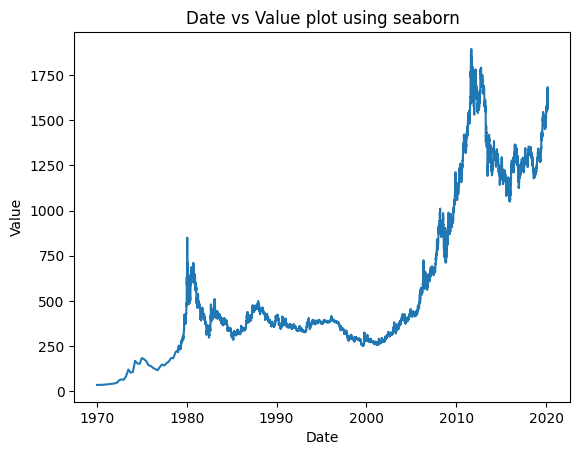

In [11]:
#1. LINEPLOT
sns.lineplot(x='Date',y='Value',data=gold)  #plotting line plot
plt.title('Date vs Value plot using seaborn')

Text(0.5, 1.0, 'Date vs Value plot using seaborn')

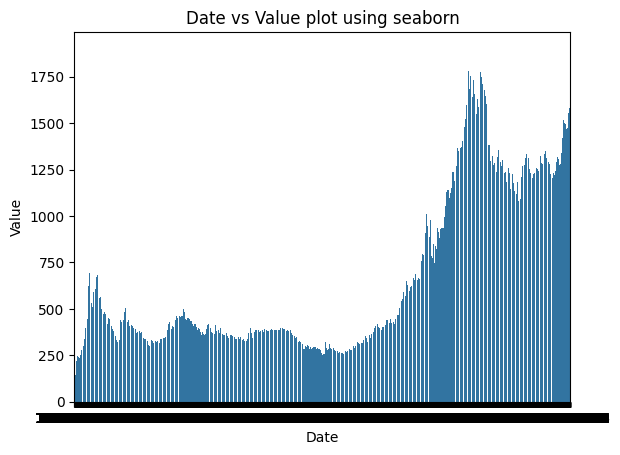

In [12]:
import matplotlib.pyplot as plt  #for visualization
import seaborn as sns
sns.barplot(x='Date',y='Value',data=gold)  #plotting barplot
plt.title('Date vs Value plot using seaborn')

Text(0.5, 1.0, 'Date vs Value plot using seaborn')

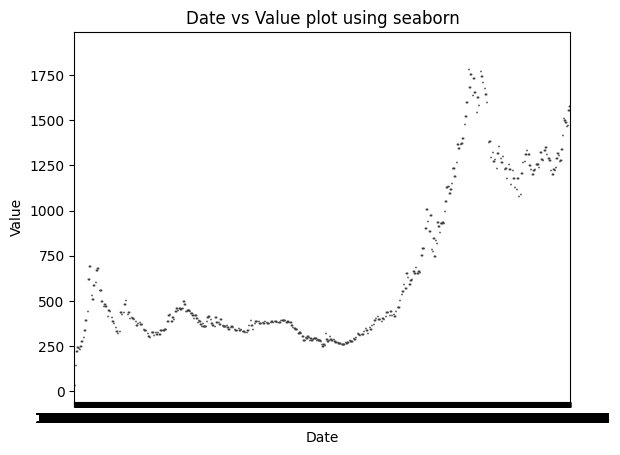

In [13]:
sns.boxplot(x='Date',y='Value',data=gold)  #plotting boxplot
plt.title('Date vs Value plot using seaborn')

Text(0.5, 1.0, 'Date vs Value plot using seaborn')

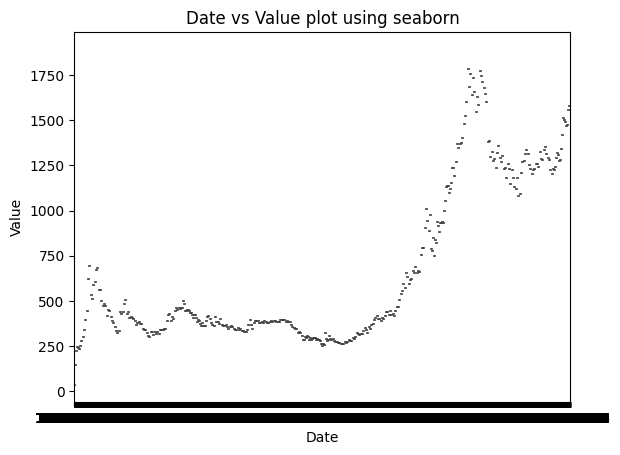

In [14]:
sns.violinplot(x='Date',y='Value',data=gold)  #plotting violinplot
plt.title('Date vs Value plot using seaborn')

Text(0.5, 1.0, 'Date vs Value plot using seaborn')

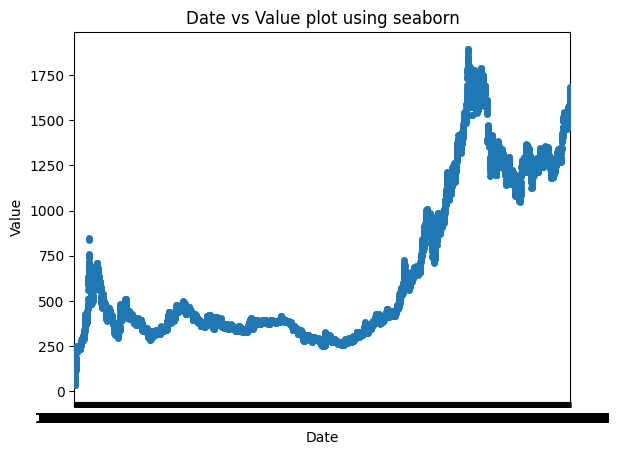

In [15]:
sns.stripplot(x='Date',y='Value',data=gold)  #plotting stripplot
plt.title('Date vs Value plot using seaborn')

Text(0.5, 1.0, 'Date vs Value plot using seaborn')

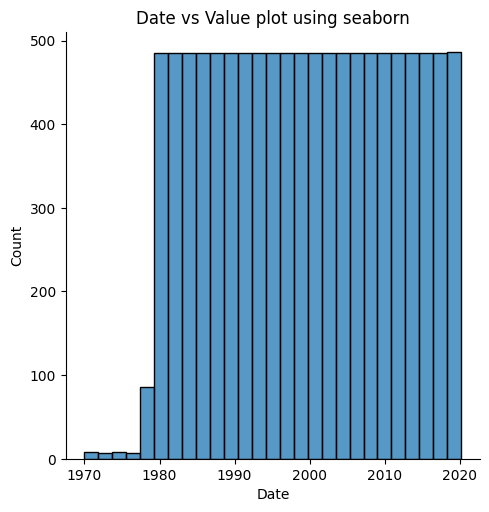

In [16]:
sns.displot(x='Date',data=gold)  #plotting distribution plot
plt.title('Date vs Value plot using seaborn')

In [11]:
import pandas as pd
gold['Date'] = pd.to_datetime(gold['Date'],format='%d-%m-%Y')
#gold['Date'] = gold['Date'].dt.date
min_date = gold['Date'].min()
gold['Days'] = (gold['Date'] - min_date).astype(str)
gold['Days'] = gold['Days'].str.extract('(\d+)').astype(int)
gold.to_csv('pre_processed_Gold_price_data.csv')
gold

,Date,Value,Days
0,1970-01-01,35.20,0
1,1970-04-01,35.10,90
2,1970-07-01,35.40,181
3,1970-10-01,36.20,273
4,1971-01-01,37.40,365
...,...,...,...
10782,2020-03-09,1672.50,18330
10783,2020-03-10,1655.70,18331
10784,2020-03-11,1653.75,18332
10785,2020-03-12,1570.70,18333


In [12]:
import datetime
def new_date_to_day(new_date):
    gold = pd.read_csv('pre_processed_Gold_price_data.csv')
    min_date = gold['Date'].min()
    new_date = datetime.datetime.strptime(new_date,"%d-%m-%Y").date()
    min_date = datetime.datetime.strptime(str(min_date),"%d-%m-%Y").date()
    new_day = (new_date-min_date).days
    
    return new_day

In [13]:
# Assuming 'timestamp_column' contains Timestamp objects
gold['Date'] = pd.to_datetime(gold['Date'])

# Convert Timestamp to Unix timestamp (float)
gold['Date'] = gold['Date'].apply(lambda x:x.timestamp())

<Axes: >

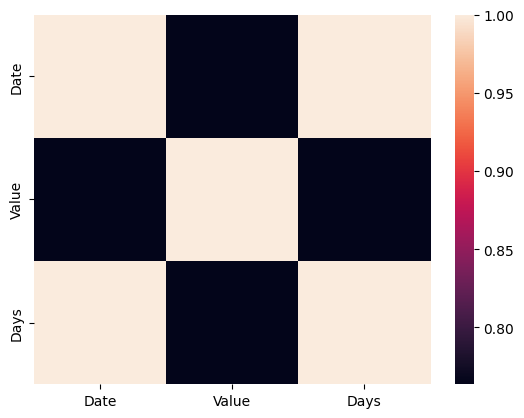

In [14]:
#heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(gold.corr()) #df.corr() gives us correlation matrix for df

In [15]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### 2c.FEATURE ENGINEERING AND FEATURE SELECTION

In [16]:
#segregation of input and output column
x = gold.iloc[:,:-1].values
y = gold.iloc[:,-1].values

#splitting data into trining and testing partion
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print('[info] data segregated into input and output successfully')

[info] data segregated into input and output successfully


In [17]:
# data spliting
X_train = gold[:8090]
X_test = gold[8090:]

print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)

X_train Shape (8090, 3)
X_test Shape (2697, 3)


In [18]:
# 9 months ahead
X_train = X_train[['Date', 'Value']]
X_test = X_test[['Date', 'Value']]

X_train.set_index('Date', inplace=True)
X_test.set_index('Date', inplace=True)

In [19]:
index_9_months = pd.date_range(X_test.index[-1], freq='MS', periods=9)
index_9_months

DatetimeIndex(['1970-01-01 00:00:01.584057600',
               '1970-02-01 00:00:01.584057600',
               '1970-03-01 00:00:01.584057600',
               '1970-04-01 00:00:01.584057600',
               '1970-05-01 00:00:01.584057600',
               '1970-06-01 00:00:01.584057600',
               '1970-07-01 00:00:01.584057600',
               '1970-08-01 00:00:01.584057600',
               '1970-09-01 00:00:01.584057600'],
              dtype='datetime64[ns]', freq='MS')

In [20]:
#segregation of input and output column
x = gold.iloc[:,:-1].values
y = gold.iloc[:,-1].values

#splitting data into trining and testing partion
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print('[info] data segregated into input and output successfully')

[info] data segregated into input and output successfully


In [21]:
gold_eda = gold.copy()
gold_eda.set_index('Date', inplace=True)

## 3.MODEL TRAINING

In [22]:
from sklearn.linear_model import LinearRegression    #importing algorithm
linear_regression_model =LinearRegression()    #initialising algorithm
linear_regression_model.fit(x_train,y_train)# training the linear regression model on data

print('[info] model training complete..')

[info] model training complete..


## 4.MODEL EVALUATION

In [23]:
#making the model predict output for x_test
y_predicted=linear_regression_model.predict(x_test)

#taking actual values
y_actual=y_test

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import math
mse=mean_squared_error(y_actual,y_predicted)
print(f'mse of given model is {mse}')

rmse=math.sqrt(mse)
print(f'rmse of given model is {rmse}')

mae=mean_absolute_error(y_actual,y_predicted)
print(f'mae of given model is {mae}')

r2=r2_score(y_actual,y_predicted)
print(f'r2 score of given model is {r2}')

mse of given model is 3.1444853658635266e-23
rmse of given model is 5.607571101522946e-12
mae of given model is 4.820364064656101e-12
r2 score of given model is 1.0


## 5.MODEL IMPLEMENTATION

In [28]:
# Assuming linear_regression_model is already trained
# Get user input
Days = int(input('Enter the number of days: '))
date = int(input('Enter the date:'))
# Store the user input values in a 2-D array
new_user_input = [[Days,date]]
# Use the model to predict output for new input
new_output = linear_regression_model.predict(new_user_input)
# Output is a number, we will give an answer in text
predicted_value = new_output[0]
# Assuming 'gold' is your DataFrame, and it has columns 'Days' and 'Value'
# Check if the Days column matches the user input
matching_row = gold[gold['Days'] == Days]
if not matching_row.empty:
    # Assuming you want to retrieve the 'Value' column from the matching row
    actual_value = matching_row['Value'].values[0]
    print(f'The predicted price is: {predicted_value}')
    print(f'The actual price for {Days} days is: {actual_value}')
else:
    print(f'No data found for {Days} days.')

Enter the number of days:  90
Enter the date: 90


The predicted price is: 0.0010416666521486098
The actual price for 90 days is: 35.1
